In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

import logging

In [3]:
df = np.load('df_dropped.npy', allow_pickle=True)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
df = pd.DataFrame(df)
df = df.rename(columns={0:'id', 1:'name', 2:'duration_ms', 3:'explicit', 4:'popularity', 5:'artists',
                        6:'danceability', 7:'energy', 8:'loudness', 9:'speechiness', 10:'acousticness',
                        11:'instrumentalness', 12:'valence', 13:'tempo', 14:'genre', 15:'year'})      
df = df.drop_duplicates(subset=['id'], keep='last')
X = df.drop(['genre', 'id', 'name', 'artists', 'explicit'], axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


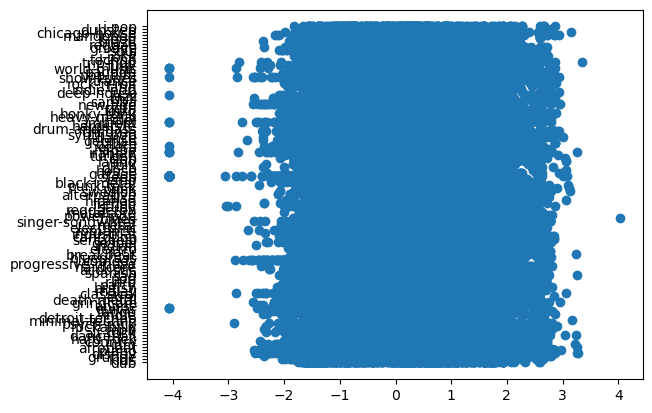

In [212]:
plt.scatter(X_train.T[9], y_train)
plt.tick_params(axis='both', which='major')
plt.show()

In [32]:
%%time

clf = LogisticRegression(random_state=13, multi_class='auto', C=1.17, n_jobs=10)
clf.fit(X_train.T[9].reshape(-1,1), y_train)

CPU times: total: 0 ns
Wall time: 1.76 s


LogisticRegression(C=1.17, n_jobs=10, random_state=13)

In [6]:
%%time

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.254214580774813
F1-score [0.11188811 0.225      0.         0.         0.30769231 0.01351351
 0.49760766 0.25414365 0.         0.06896552 0.24615385 0.
 0.18181818 0.44642857 0.35087719 0.25482625 0.50273224 0.09022556
 0.85714286 0.21468927 0.         0.08928571 0.20833333 0.06818182
 0.41304348 0.14141414 0.16783217 0.36111111 0.07352941 0.06896552
 0.         0.01574803 0.02020202 0.06521739 0.         0.31906615
 0.04511278 0.18181818 0.05263158 0.         0.22764228 0.03636364
 0.69868996 0.01851852 0.26436782 0.20606061 0.33142857 0.
 0.0952381  0.26190476 0.27272727 0.06382979 0.47580645 0.
 0.27428571 0.         0.         0.         0.11111111 0.43881857
 0.37837838 0.38461538 0.         0.         0.12844037 0.11607143
 0.28125    0.03773585 0.19607843 0.12154696 0.25373134 0.07936508
 0.35       0.42060086 0.01754386 0.52459016 0.34782609 0.37542662
 0.2464986  0.30263158 0.04469274 0.21621622 0.3245614  0.20111732
 0.24390244 0.1097561  0.         0.03125    0.   

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C=1.17 -> 0.254214580774813

0.8878593717364155


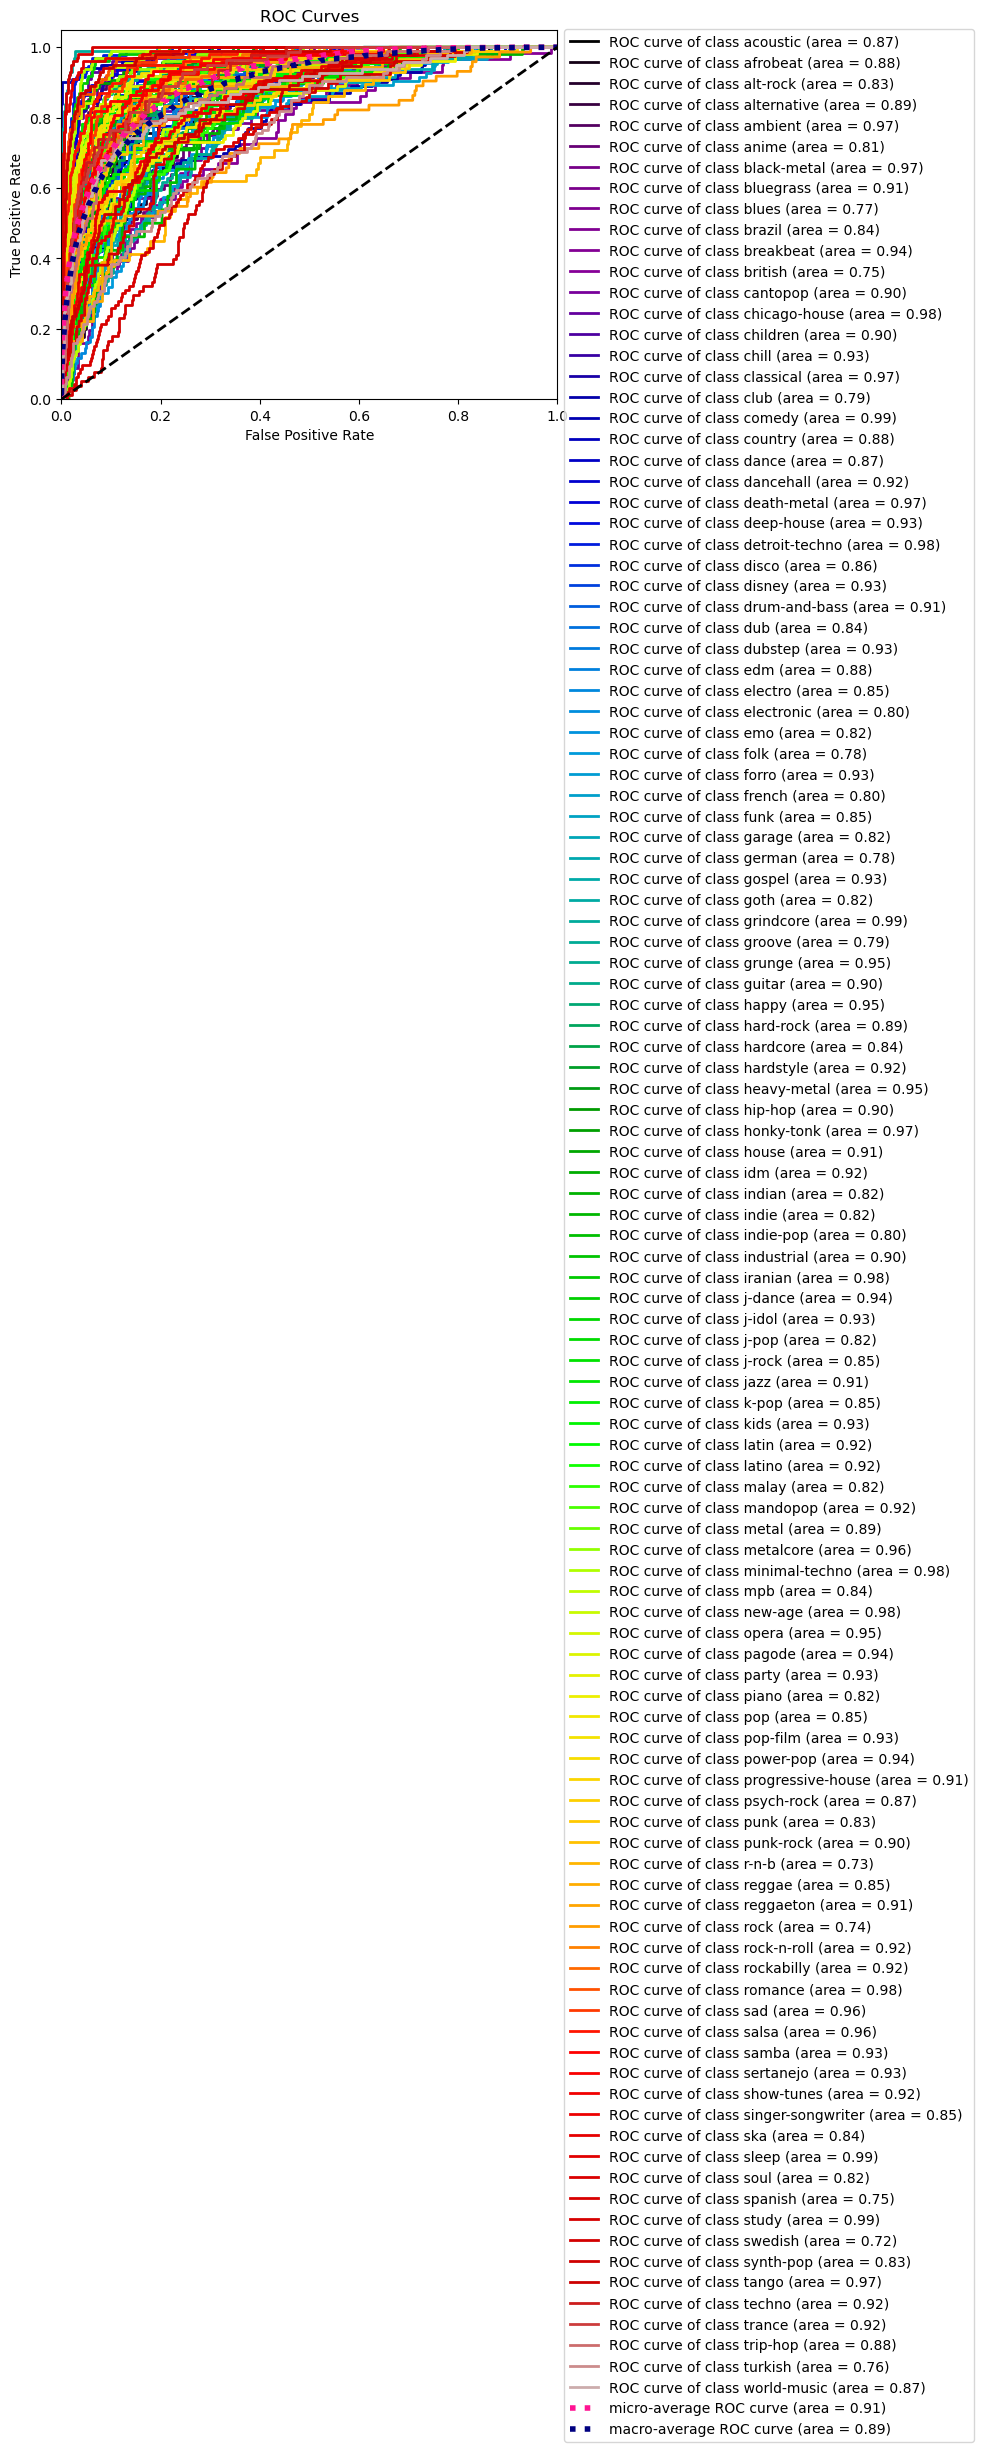

In [9]:
plot_roc(y_test, clf.predict_proba(X_test))


print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))
figsize=(14,12)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [11]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro")

0.8878593717364155

In [274]:
%%time

Cs = [1.5, 1.6, 1.7, 1.8, 1.9, 2]

for i in range(len(Cs)):
    clf = LogisticRegression(random_state=19, multi_class='auto', n_jobs=1, C=Cs[i])
    #clf.fit(X_train, y_train)
    print('C: %s' %Cs[i])
    print('Cross-validation score: %s' % np.mean(cross_val_score(clf, X_sm, y_sm, cv=10, n_jobs=2)))

C: 1.5
Cross-validation score: 0.21839724680432643
C: 1.6
Cross-validation score: 0.21864306784660767
C: 1.7
Cross-validation score: 0.21863323500491644
C: 1.8
Cross-validation score: 0.21875122910521144
C: 1.9
Cross-validation score: 0.21851524090462146
C: 2
Cross-validation score: 0.21854473942969518
CPU times: total: 1.19 s
Wall time: 7min 37s


In [256]:
np.where(f1_score(y_test, y_pred, average=None) == 0)

(array([  2,   3,   8,   9,  11,  20,  29,  30,  34,  39,  47,  53,  55,
         56,  57,  62,  63,  67,  86,  88,  89, 102, 103, 105, 108],
       dtype=int64),)

In [304]:
clf.coef_

array([[-0.14450722,  0.55623794, -0.18759567, ...,  0.28131111,
        -0.01373731,  0.04455102],
       [ 0.58955356, -0.51960536,  0.44261355, ...,  0.90988584,
        -0.17258775, -0.59373172],
       [ 0.06160731,  0.64543035, -0.59155349, ...,  0.32562383,
        -0.08279975,  0.00174384],
       ...,
       [ 0.59483111, -0.1502543 ,  0.56037505, ..., -0.12975914,
        -0.13827561, -1.05093989],
       [-0.01408908,  0.38112485,  0.35800662, ..., -0.3526413 ,
        -0.03321748, -0.14675596],
       [ 0.71751771,  0.74748434, -1.10855252, ..., -0.74536216,
        -0.05514758,  0.35267468]])

In [238]:
sm = SMOTE(random_state=13)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [240]:
%%time

Cs = [1.1, .12, .13, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

for i in range(len(Cs)):
    clf = LogisticRegression(multi_class='auto', n_jobs=10, C=Cs[i])
    clf.fit(X_sm, y_sm)
    y_pred = clf.predict(X_test)
    print('C: %s' %Cs[i])
    print('Accuracy %s' % accuracy_score(y_test, y_pred))

C: 1.1
Accuracy 0.2389192810092665
C: 0.12
Accuracy 0.23579323434185553
C: 0.13
Accuracy 0.23668639053254437
C: 1.4
Accuracy 0.2390309255331026
C: 1.5
Accuracy 0.2392542145807748
C: 1.6
Accuracy 0.23880763648543038
C: 1.7
Accuracy 0.23869599196159427
C: 1.8
Accuracy 0.23869599196159427
C: 1.9
Accuracy 0.23869599196159427
C: 2
Accuracy 0.23824941386624987
CPU times: total: 1.5 s
Wall time: 2min 33s


In [242]:
%%time

clf = LogisticRegression(random_state=0, multi_class='auto', C=1.5, n_jobs=10)
clf.fit(X_sm, y_sm)

CPU times: total: 78.1 ms
Wall time: 15.6 s


LogisticRegression(C=1.5, n_jobs=10, random_state=0)

In [243]:
%%time

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.2392542145807748
F1-score [0.16666667 0.23287671 0.08163265 0.06060606 0.29761905 0.03030303
 0.4195122  0.25149701 0.         0.0952381  0.2295082  0.
 0.1827957  0.43946188 0.38647343 0.20725389 0.48913043 0.0625
 0.87684729 0.15384615 0.07692308 0.09917355 0.18918919 0.14364641
 0.42391304 0.13714286 0.18300654 0.36097561 0.         0.12121212
 0.0754717  0.         0.02222222 0.08474576 0.02439024 0.31007752
 0.01694915 0.10852713 0.06557377 0.02083333 0.24       0.03703704
 0.69406393 0.         0.29050279 0.21794872 0.31884058 0.03448276
 0.0794702  0.21698113 0.23318386 0.08333333 0.51327434 0.04
 0.28409091 0.048      0.         0.         0.12844037 0.3943662
 0.30769231 0.38910506 0.03539823 0.02439024 0.2278481  0.06578947
 0.30493274 0.09210526 0.17801047 0.08888889 0.2464455  0.08888889
 0.35897436 0.40609137 0.         0.53333333 0.36199095 0.42194093
 0.27874564 0.24817518 0.03030303 0.23809524 0.31390135 0.15053763
 0.1978022  0.11382114 0.03333333 0.02985075

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(80605, 11)

In [34]:
%%time

clf = LogisticRegression()

for i in range(11):
    clf.fit(X_train.T[i].reshape(-1,1), y_train)
    y_pred = clf.predict(X_test.T[i].reshape(-1,1))
    print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.03349335715083175
Accuracy 0.0382940716757843
Accuracy 0.035726247627553866
Accuracy 0.030702244054929106
Accuracy 0.03226526738863459
Accuracy 0.03583789215138997
Accuracy 0.03594953667522608
Accuracy 0.023445350005582226
Accuracy 0.03126046667410964
Accuracy 0.03114882215027353
Accuracy 0.026683041196829297
CPU times: total: 10.5 s
Wall time: 31 s


## Gradient Boosting

In [39]:
df = np.load('df_dropped.npy', allow_pickle=True)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
df = pd.DataFrame(df)
df = df.rename(columns={0:'id', 1:'name', 2:'duration_ms', 3:'explicit', 4:'popularity', 5:'artists',
                        6:'danceability', 7:'energy', 8:'loudness', 9:'speechiness', 10:'acousticness',
                        11:'instrumentalness', 12:'valence', 13:'tempo', 14:'genre', 15:'year'})      
df = df.drop_duplicates(subset=['id'], keep='last')
X_reg = df.drop(['genre', 'id', 'name', 'artists', 'explicit', 'energy'], axis=1)
y_reg = df['energy']
scaler = StandardScaler()
scaler.fit(X_reg)
X_norm_reg = scaler.transform(X_reg)
X_norm_reg = pd.DataFrame(X_norm_reg)
X_norm_reg = X_norm_reg.rename(columns={0:'duration_ms', 1:'popularity', 2:'danceability', 3:'loudness', 
                        4:'speechiness', 5:'acousticness', 6:'instrumentalness', 7:'valence', 8:'tempo',
                        9:'year'})
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_norm_reg, y_reg, test_size=0.1, random_state=100, stratify=y)

In [166]:
%%time

n_estimators = 650
learning_rates = 0.2
max_depths = 3
min_samples_splits = [0.0001, 0.0005, 0.001, 0.005, 0.01]
min_samples_leafs = [0.0001, 0.0005, 0.001, 0.005, 0.01]

best_cv_score = 0
#best_depth = 0
best_split = 0
best_leaf = 0
#tbplotted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#for i in range(len(max_depths)):
for j in range(len(min_samples_splits)):
        for k in range(len(min_samples_leafs)):
            reg = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rates, max_depth=max_depths, random_state=13,
                                        min_samples_split=min_samples_splits[j], min_samples_leaf=min_samples_leafs[k])
            reg.fit(X_train_reg.drop(['duration_ms', 'popularity'], axis=1), y_train_reg)

        #y_pred_reg = reg.predict(X_test_reg)
            cv_score = np.mean(cross_val_score(reg, X_train_reg.drop(['duration_ms', 'popularity'], axis=1), y_train_reg, cv=10, n_jobs=10, scoring='r2'))
            #tbplotted[j] = cv_score
    
#            print('depth: %s' % max_depths[i])
            print('splits: %s' % min_samples_splits[j])
            print('leafs: %s' % min_samples_leafs[k])
            print('Cross-validation score: %s' % cv_score)

            if best_cv_score < cv_score:
                best_cv_score = cv_score
#                best_depth = max_depths[i]
                best_split = min_samples_splits[j]
                best_leaf = min_samples_leafs[k]
            

#print('Best parameters: \n Best number of estimators: %s ' % best_n_est)
#print(' Best learning rate: %s ' % best_rate)
#print(' Best cross-validation score: %s ' % best_cv_score)
#sns.lineplot(x=learning_rates, y=tbplotted, marker='o')

splits: 0.0001
leafs: 0.0001
Cross-validation score: 0.8556319486751105
splits: 0.0001
leafs: 0.0005
Cross-validation score: 0.8554091528298029
splits: 0.0001
leafs: 0.001
Cross-validation score: 0.8548440382813182
splits: 0.0001
leafs: 0.005
Cross-validation score: 0.8518855042858554
splits: 0.0001
leafs: 0.01
Cross-validation score: 0.8468105315922809
splits: 0.0005
leafs: 0.0001
Cross-validation score: 0.8556469130077783
splits: 0.0005
leafs: 0.0005
Cross-validation score: 0.8554091528298029
splits: 0.0005
leafs: 0.001
Cross-validation score: 0.8548440382813182
splits: 0.0005
leafs: 0.005
Cross-validation score: 0.8518855042858554
splits: 0.0005
leafs: 0.01
Cross-validation score: 0.8468105315922809
splits: 0.001
leafs: 0.0001
Cross-validation score: 0.8554275719061621
splits: 0.001
leafs: 0.0005
Cross-validation score: 0.8554091528298029
splits: 0.001
leafs: 0.001
Cross-validation score: 0.8548440382813182
splits: 0.001
leafs: 0.005
Cross-validation score: 0.8518855042858554
splits

In [167]:
print('Best parameters:') #\n Best depth: %s ' % best_depth)
print(' Best splits: %s ' % best_split)
print(' Best leafs: %s ' % best_leaf)
print(' Best cross-validation score: %s ' % best_cv_score)

Best parameters:
 Best splits: 0.0005 
 Best leafs: 0.0001 
 Best cross-validation score: 0.8556469130077783 


Best parameters: 
 Best number of estimators: 650 
 Best learning rate: 0.2
 Best depth: 8
 Best splits: 0.005
 Best leafs: 0.0005
 Best cross-validation score: 0.8652610110641193

 R2: 0.866
MSE: 0.009
MAE: 0.069

3min 50s  ->   3min 5 s

In [135]:
%%time

reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.3, random_state=13, max_depth=3, min_samples_split=0.0001, min_samples_leaf=0.001)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

R2: 0.858
MSE: 0.009
MAE: 0.072
CPU times: total: 40.9 s
Wall time: 56.6 s


The higher the number of estimator, the higher the cv score. Being fairly robust to overfitting, increasing the number of estimators only improves the performance, but after some time the increase in performance becomes negligible. For each n_estimators, the performance has a peak around the 0.2-0.5 value for learning rate: the higher the number of estimators, the lower is the value at which the peak appears. [Show plots to hammer the point in]
Then it comes down to max_depth, min_samples_leaf, min_numbers_split.

Then R^2 and MSE (and maybe MAE).

For the sake of speed, however, if we keep it limited to max depth = 3, number of estimators 400 (when the curve starts to plateau) and its relative learning rate equal to 0.3 (from its cross-validation), we get:
splits: 0.0001
leafs: 0.001
best cross-validation score: 0.858093669309453

 , R2: 0.858
MSE: 0.009
MAE: 0.072

56.6s   ->   40.9s

In [126]:
%%time

reg = GradientBoostingRegressor(n_estimators=650, learning_rate=0.2, random_state=13, max_depth=3, min_samples_split=0.0005, min_samples_leaf=0.0001)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

R2: 0.860
MSE: 0.009
MAE: 0.072
CPU times: total: 1min 13s
Wall time: 1min 30s


In [128]:
%%time

reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.2, random_state=13, max_depth=3, min_samples_split=0.0005, min_samples_leaf=0.0001)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

R2: 0.858
MSE: 0.009
MAE: 0.072
CPU times: total: 53 s
Wall time: 55.2 s


In [147]:
X_train_reg.drop(['duration_ms'], axis=1)

,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,valence,tempo,year
88949,-0.950450,1.730783,-0.001150,-0.382791,0.188994,-0.535927,1.245688,0.197546,0.771467
67448,-1.136282,2.370106,0.077896,-0.057272,-0.883537,-0.535927,1.462457,-0.267908,-0.608199
36528,1.279542,-0.832166,0.297425,-0.456892,-0.957689,-0.535927,-0.792703,0.693978,-0.435741
86944,-0.392952,-1.120710,-2.415969,-0.426899,1.820398,-0.534943,-0.883974,-0.427210,0.426550
79053,1.279542,0.316352,0.679257,-0.349268,-0.215902,-0.535927,-0.864959,-1.098382,0.685237
...,...,...,...,...,...,...,...,...,...
19630,-0.067745,0.593581,0.935916,0.073288,-0.635575,-0.535915,1.664014,0.160559,-2.332781
28922,-1.461489,1.261192,0.542793,1.521802,-0.218857,-0.535927,-0.431421,0.695605,0.771467
21212,-1.415031,1.430924,0.167277,-0.306925,-0.966910,1.433097,0.017329,-0.400184,0.771467
22823,0.722044,0.214513,-2.124859,-0.430428,-0.915455,2.272556,-1.455560,-0.679045,-1.729177


In [155]:
%%time

attr = ['duration_ms', 'popularity', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'year']

for attribute in attr:
    reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.2, random_state=13, max_depth=3, min_samples_split=0.0005, min_samples_leaf=0.0001)
    reg.fit(X_train_reg.drop([attribute], axis=1), y_train_reg)

    cv_score = np.mean(cross_val_score(reg, X_train_reg.drop([attribute], axis=1), y_train_reg, cv=10, n_jobs=10, scoring='r2'))

    print('No %s:' % attribute)
    print('Cross-validation score: %s' % cv_score)

#y_pred_reg = reg.predict(X_test_reg.drop([attribute], axis=1))

#print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
#print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
#print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

No duration_ms:
Cross-validation score: 0.8556540384999325
No popularity:
Cross-validation score: 0.8555891046236092
No danceability:
Cross-validation score: 0.8435177715928477
No loudness:
Cross-validation score: 0.747552685529675
No speechiness:
Cross-validation score: 0.8207701128632905
No acousticness:
Cross-validation score: 0.8103430687966
No instrumentalness:
Cross-validation score: 0.8494995906466286
No valence:
Cross-validation score: 0.8340174223540957
No tempo:
Cross-validation score: 0.8531161076296547
No year:
Cross-validation score: 0.8551791548037141
CPU times: total: 7min 18s
Wall time: 15min 45s


In [164]:
reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.2, random_state=13, max_depth=3, min_samples_split=0.0005, min_samples_leaf=0.0001)
reg.fit(X_train_reg.drop(['duration_ms', 'popularity'], axis=1), y_train_reg)

cv_score = np.mean(cross_val_score(reg, X_train_reg.drop(['duration_ms', 'popularity'], axis=1), y_train_reg, cv=10, n_jobs=10, scoring='r2'))

print('Cross-validation score: %s' % cv_score)

Cross-validation score: 0.8536076729112605
